# Import 

In [2]:
import numpy as np
import os
from scipy.misc import imresize
from scipy import ndimage
import matplotlib.pyplot as plt
from progress.bar import Bar
%matplotlib inline

# Load Data 

Loading Done


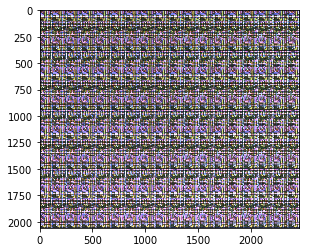

In [7]:
# Loading Image & Error
cwd = os.getcwd()
dataDir = "/data/full/"
cats = os.listdir(cwd + dataDir)
cats.remove(".ipynb_checkpoints")
catDic = { cats[i] : i for i in range(len(cats)) }
catDic['NORMAL'] = len(catDic)

wid_o = 320
hei_o = 320
wid_r = 256
hei_r = 256
X_normal = []
y_normal = []
X_abnormal = []
y_abnormal = []
cnt = 0

for c in Bar("Processing").iter(cats) :
    for name in os.listdir(cwd + dataDir + c)[:1] :
        if name.split('.')[-1] == "jpg" :
            plt.imshow(ndimage.imread(cwd + dataDir + c + "/" + name))
            break
            x = ndimage.imread(cwd + dataDir + c + "/" + name)[:hei_o,:wid_o]
            X_normal.append(imresize(x, (hei_r, wid_r, 3)))
            y_normal.append(catDic['NORMAL'])
        elif name.split('_')[-2] == "O" :
            break
            X_abnormal.append(ndimage.imread(cwd + dataDir + c + "/" + name))
            y_abnormal.append(catDic[c])

X_normal = np.array(X_normal)
y_normal = np.array(y_normal)
X_abnormal = np.array(X_abnormal)
y_abnormal = np.array(y_abnormal)
print "Loading Done"

In [6]:
print X_normal.shape

(2302, 256, 256, 3)


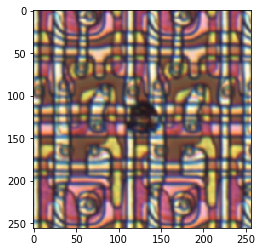

In [6]:
plt.imshow(ndimage.imread(cwd + dataDir + c + "/" + name))

In [22]:
def visualize(X, y) :
    fig, ax = plt.subplots(2, 3, figsize=(30, 30))
    idxs = np.random.permutation(len(X))[:6]
    for i in range(2):
        for j in range(3):
            n = 2*i + j
            x = X[idxs[n]]
            print y[idxs[n]]
            ax[i,j].imshow(x)

13
13
13
13
13
13


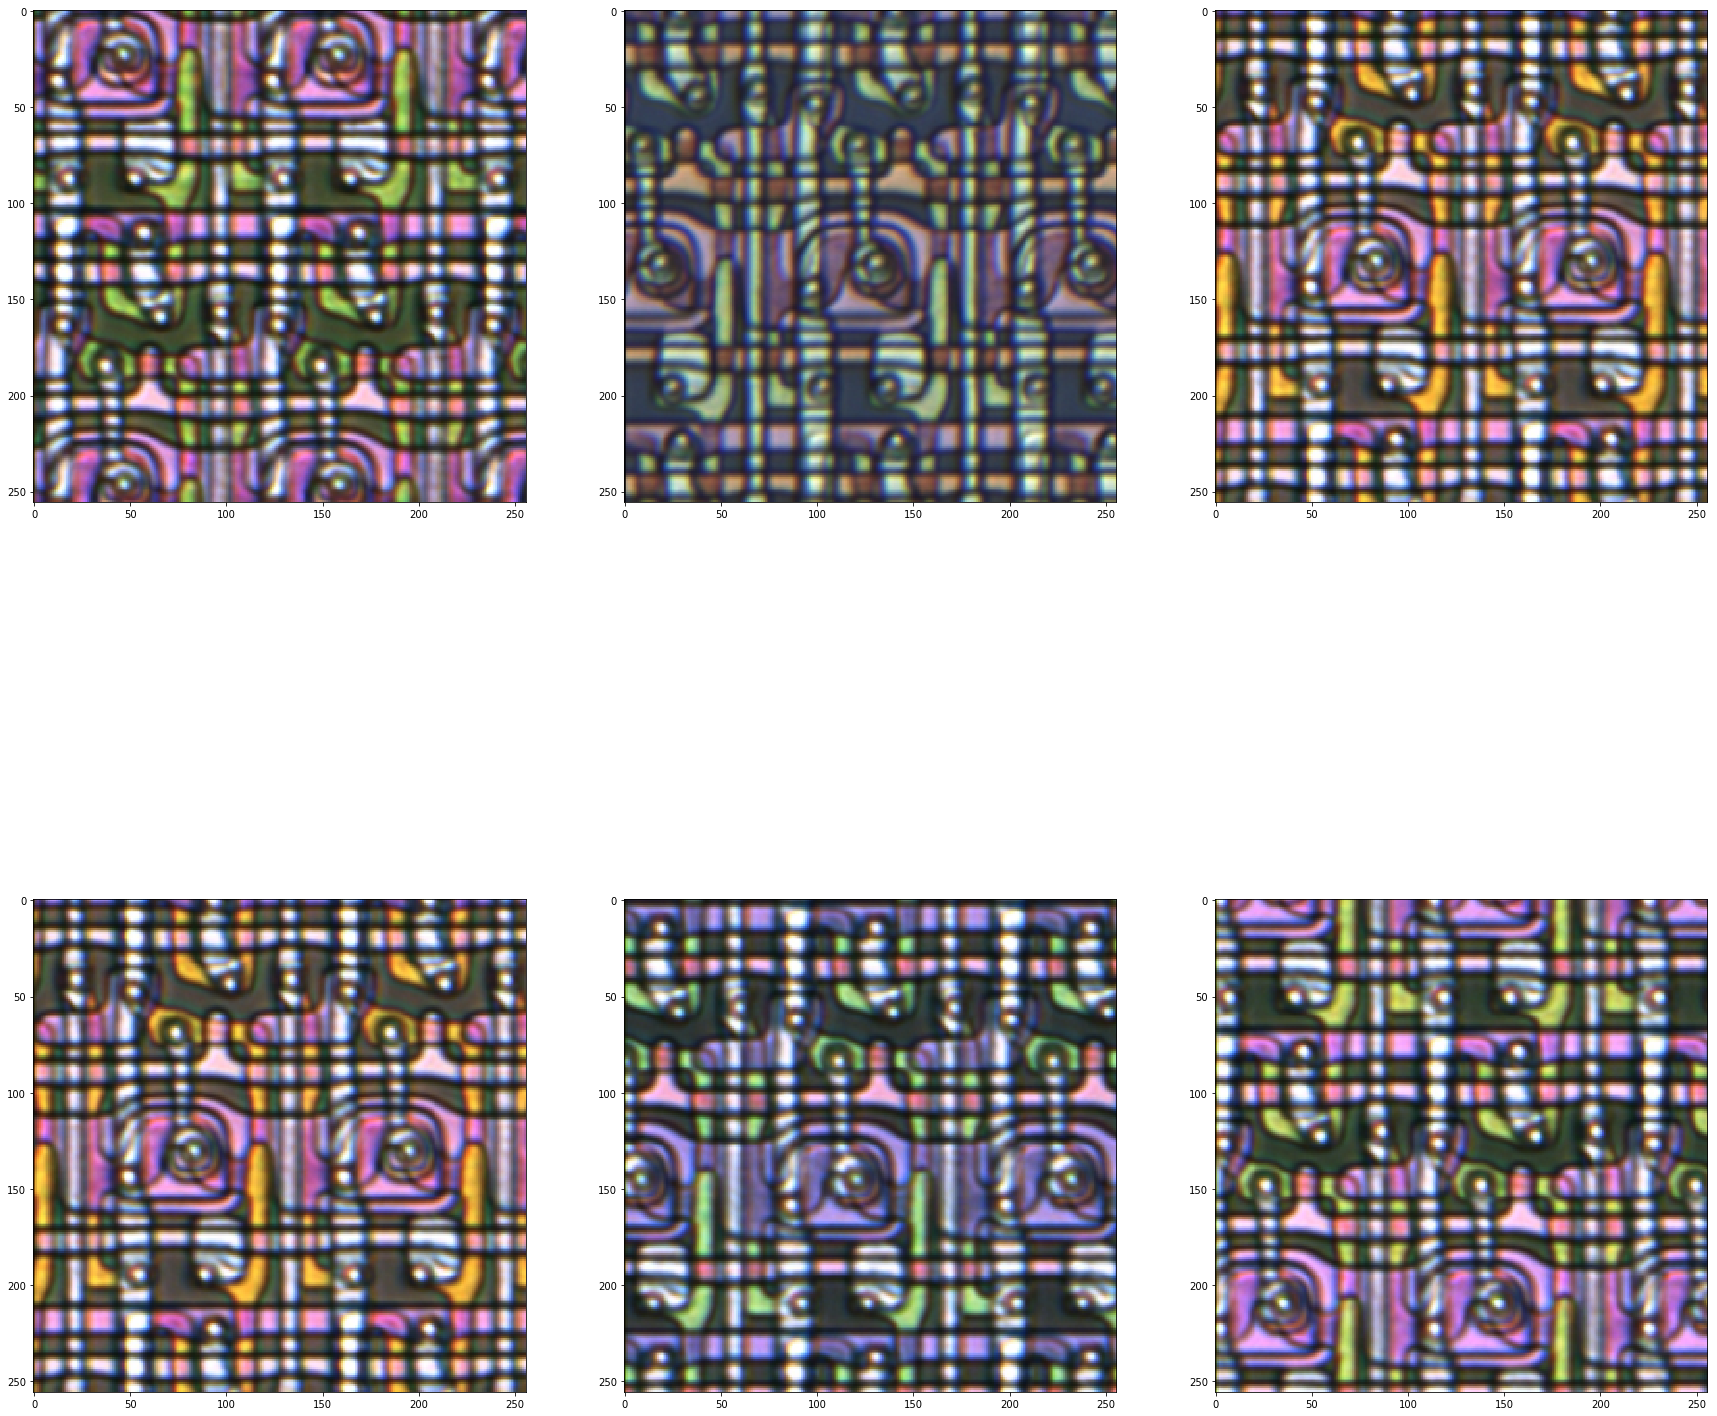

In [23]:
visualize(X_normal, y_normal)

7
3
1
1
8
0


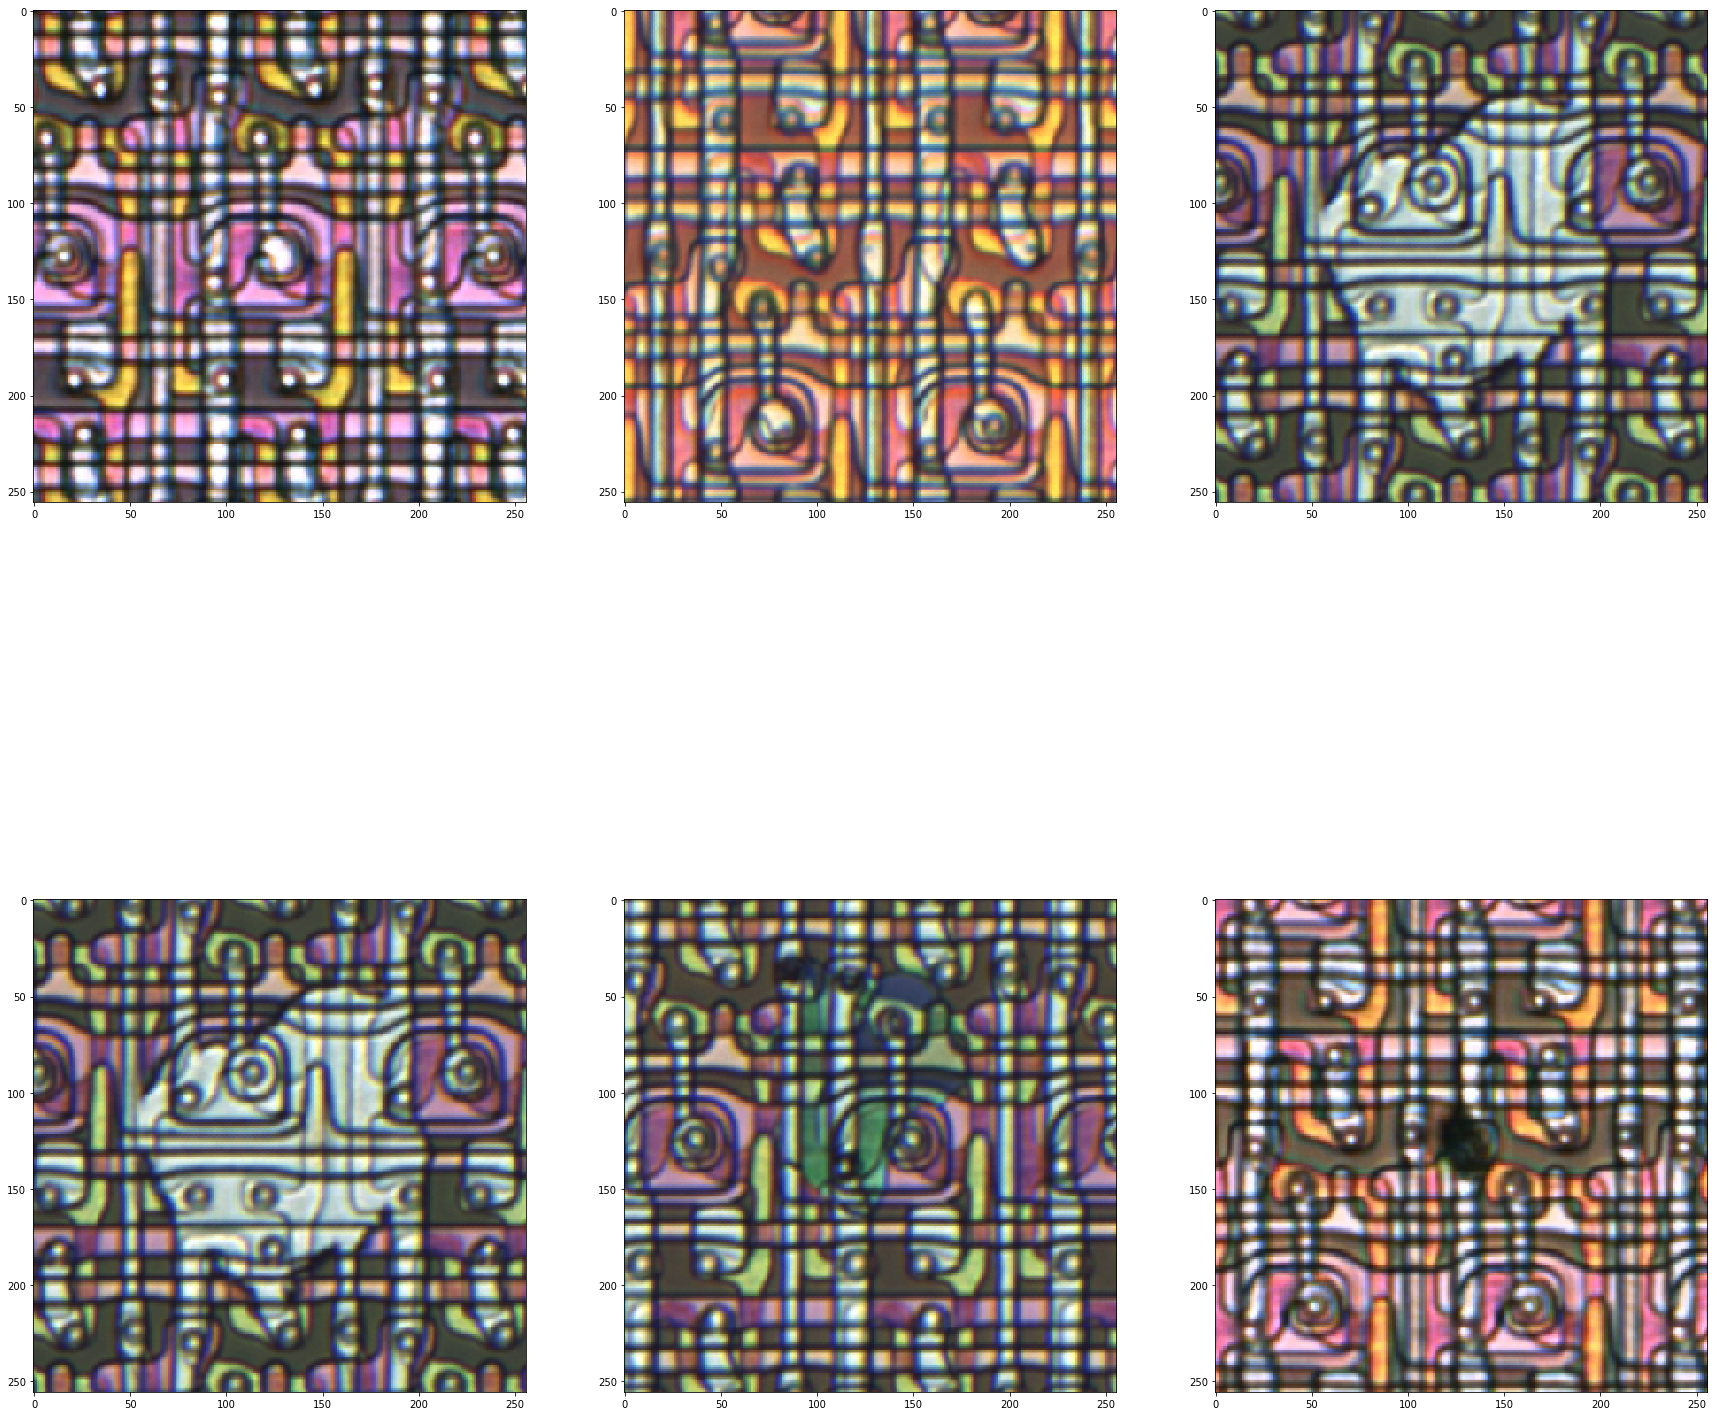

In [24]:
visualize(X_abnormal, y_abnormal)

# Make Train Data

In [8]:
# idx_abnorm = np.random.permutation(len(X_abnormal))
idx_norm = np.random.permutation(len(X_normal))[:100]
X = np.concatenate((X_abnormal, X_normal[idx_norm]), axis=0)
y = np.concatenate((y_abnormal, y_normal[idx_norm]))
# X = X_abnormal
# y = y_abnormal

In [10]:
print X_normal.shape
print X.shape
print y

(2302, 256, 256, 3)
(2400, 256, 256, 3)
[ 0  0  0 ..., 23 23 23]


# Save 

In [11]:
# save Data
import pickle
Data = {'X':X, 'y':y}
with open(os.getcwd() + "/data/FullDataAllClass100.pkl", 'wb') as f :
    pickle.dump(Data, f, pickle.HIGHEST_PROTOCOL)